##1. Python Knowledge

You are given a list of employee records in the form of dictionaries.

Your task is to write Python code to perform the following operations:

1. Write a function average_salary(employees) that calculates and returns the average salary of all employees.

2. Write a function highest_salary_department(employees, department) that finds and returns the employee with the highest salary in a given department.

3. Write a function increase_salary(employees, percentage) that increases the salary of each employee by a given percentage. Update the 'salary' field in each employee dictionary.

4. Write a function department_summary(employees) that returns a dictionary summarizing the total number of employees and the total salary in each department.




In [ ]:
employees = [
    {'id': 1, 'name': 'Alice', 'salary': 50000, 'department': 'HR'},
    {'id': 2, 'name': 'Bob', 'salary': 60000, 'department': 'Engineering'},
    {'id': 3, 'name': 'Charlie', 'salary': 55000, 'department': 'HR'},
    {'id': 4, 'name': 'David', 'salary': 70000, 'department': 'Engineering'},
    {'id': 5, 'name': 'Eva', 'salary': 60000, 'department': 'Finance'}
]

## Python Knowledge Answers

In [ ]:
# Setting everything
import numpy as np
import pandas as pd

# Creating DataFrame for comfort
employees_data = pd.DataFrame(employees)
employees_data

,id,name,salary,department
0,1,Alice,50000,HR
1,2,Bob,60000,Engineering
2,3,Charlie,55000,HR
3,4,David,70000,Engineering
4,5,Eva,60000,Finance


In [ ]:
# 1st Task
def average_salary(employees):
  return employees['salary'].mean()

average_salary(employees_data)

59000.0

In [ ]:
# 2nd Task
def highest_salary_department(employees, department):
  department = employees[employees['department'] == department]
  return department['salary'].max()

highest_salary_department(employees_data, 'Engineering')

70000

In [ ]:
# 3rd Task
def increase_salary(employees, percentage): # percentage as 10, 20 etc.
  employees['salary'] = employees['salary'].apply(lambda x: x * (1 + (percentage / 100)))
  return employees

employees_data = increase_salary(employees_data, 10)
employees_data

,id,name,salary,department
0,1,Alice,55000.0,HR
1,2,Bob,66000.0,Engineering
2,3,Charlie,60500.0,HR
3,4,David,77000.0,Engineering
4,5,Eva,66000.0,Finance


In [ ]:
# 4th Task
def department_summary(employees):
  summary = employees.groupby('department').agg({'id': 'count', 'salary': 'sum'})
  summary.rename(columns = {'id': 'employee_num', 'salary': 'total_salary'}, inplace=True)
  return summary

department_summary(employees_data)

,employee_num,total_salary
department,,
Engineering,2,143000.0
Finance,1,66000.0
HR,2,115500.0


##2. EDA

Exploring Factors of Life Expectancy

WHO created a dataset of the health status of all countries over time and includes statistics on life expectancy, adult mortality, and more. Using this dataset, explore the relationships between various variables.

Download dataset here: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who


This dataset was created to answer the following questions:

1. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

2. What is the impact of schooling on the lifespan of humans?

3. Do densely populated countries tend to have a lower life expectancy?


Tip: grouping, basic stats, averaging and comparing between groups, comparing distributions, and plotting correlations are your best friends.

## EDA Answers

In [ ]:
# Setting Data
data = pd.read_csv('Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Removing columns
data = data[['Country', 'Life expectancy ', 'percentage expenditure', 'Total expenditure', 'Population', 'Schooling']]
data.rename(columns={'Life expectancy ' : 'life_expectancy'}, inplace=True)

<ipython-input-6-b51a13916741>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Life expectancy ' : 'life_expectancy'}, inplace=True)


In [ ]:
# Adding column with health expenditure
data["health_expenditure"] = data["percentage expenditure"] * data["Total expenditure"] / 100
data.drop(columns = {'percentage expenditure', 'Total expenditure'}, inplace = True)

In [ ]:
data

,Country,life_expectancy,Population,Schooling,health_expenditure
0,Afghanistan,65.0,33736494.0,10.1,5.816417
1,Afghanistan,59.9,327582.0,10.0,6.014229
2,Afghanistan,59.9,31731688.0,9.9,5.952724
3,Afghanistan,59.5,3696958.0,9.8,6.661295
4,Afghanistan,59.2,2978599.0,9.5,0.558542
...,...,...,...,...,...
2933,Zimbabwe,44.3,12777511.0,9.2,0.000000
2934,Zimbabwe,44.5,12633897.0,9.5,0.000000
2935,Zimbabwe,44.8,125525.0,10.0,0.000000
2936,Zimbabwe,45.3,12366165.0,9.8,0.000000


In [ ]:
grouped = data.groupby('Country').agg({'life_expectancy': 'mean', 'health_expenditure': 'mean'})
grouped

,life_expectancy,health_expenditure
Country,,
Afghanistan,58.19375,2.954977
Albania,75.15625,11.314435
Algeria,73.61875,12.878853
Angola,49.01875,4.043127
Antigua and Barbuda,75.05625,54.611760
...,...,...
Venezuela (Bolivarian Republic of),73.38750,0.000000
Viet Nam,74.77500,0.000000
Yemen,63.86250,0.000000


<Axes: xlabel='health_expenditure', ylabel='life_expectancy'>

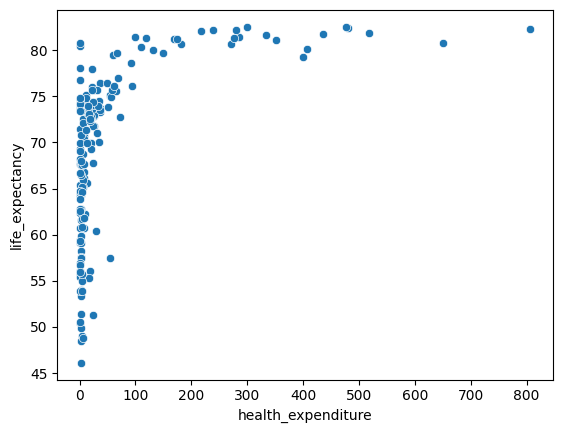

In [ ]:
sns.scatterplot(data = grouped, x = 'health_expenditure', y = 'life_expectancy')

**No you can see that as it increases in some place there is no difference**

<Axes: xlabel='Schooling', ylabel='life_expectancy'>

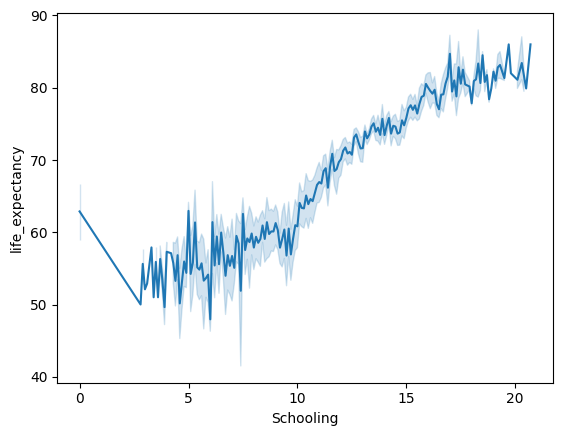

In [ ]:
sns.lineplot(data = data, x = 'Schooling', y = 'life_expectancy')

**You can see that life expectancy increases as expenditures for schooling increases. People tend to be safer by knowing information on how to protect themselves**

#4. Statistical Test

Student Sleep Patterns and Academic Performance: A Statistical Analysis.

A university conducted a study to investigate the relationship between students' average daily sleep duration and their exam performance. Two groups of students were compared:

Group A: Students who averaged 7+ hours of sleep per night during the semester (n=45)

Group B: Students who averaged less than 7 hours of sleep per night during the semester (n=42)

The following data represents final exam scores (out of 100) for both groups:

Group A (7+ hours sleep):

[89, 92, 87, 83, 85, 90, 88, 86, 91, 84, 89, 93, 88, 86, 85, 87, 90, 85, 86, 88,
92, 85, 89, 87, 84, 88, 90, 86, 85, 89, 91, 87, 84, 88, 86, 89, 85, 90, 88, 87,
86, 89, 85, 88, 90]

Group B (<7 hours sleep):
[82, 79, 81, 85, 80, 78, 83, 81, 84, 77, 82, 80, 79, 83, 81, 78, 82, 80, 84, 79,
81, 83, 80, 78, 82, 85, 79, 81, 80, 83, 78, 82, 80, 84, 79, 81, 83, 80, 78, 82,
81, 79]


1. Hypothesis Formulation
- State the null hypothesis (H₀)
- State the alternative hypothesis (H₁)
- Explain why this is a case for an independent samples t-test


2. Descriptive Statistics
- Calculate the mean for each group
- Calculate the standard deviation for each group
- Create a box plot comparing the distributions
- Comment on any apparent differences between the groups


3. T-Test Analysis

- Conduct an independent samples t-test (α = 0.05)
- Show all calculations step by step
- State whether the test is one-tailed or two-tailed and justify your choice


4. Results Interpretation

- Report the t-statistic and p-value
- Make a decision about the null hypothesis
- Discuss the practical significance of your findings

# 4th Part Answers

In [ ]:
# Setting
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

group_a = np.array([89, 92, 87, 83, 85, 90, 88, 86, 91, 84, 89, 93, 88, 86, 85, 87, 90, 85, 86, 88, 92, 85, 89, 87, 84, 88, 90, 86, 85, 89, 91, 87, 84, 88, 86, 89, 85, 90, 88, 87, 86, 89, 85, 88, 90])
group_b = np.array([82, 79, 81, 85, 80, 78, 83, 81, 84, 77, 82, 80, 79, 83, 81, 78, 82, 80, 84, 79, 81, 83, 80, 78, 82, 85, 79, 81, 80, 83, 78, 82, 80, 84, 79, 81, 83, 80, 78, 82, 81, 79])

### 1st Part


Null Hypothesis: Sleep time doesn't affect exam scores

Alternative: Sleep affects exam scores


This is case because by given exam scores of students we can collect info about affection of sleep on scores

### 2nd Part

Group A mean: 87.55555555555556
Group B mean: 80.88095238095238

Group A std: 2.390309655026641
Group B std: 2.049417814571935



Text(0.5, 1.0, 'Score Distribution Comparison')

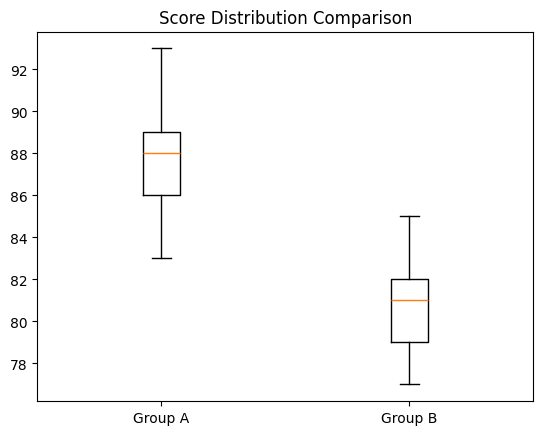

In [ ]:
# 2nd Part
# ------------------------------------
def group_mean(group):
  return np.mean(group)

group_a_mean = group_mean(group_a)
group_b_mean = group_mean(group_b)

print(f'Group A mean: {group_a_mean}')
print(f'Group B mean: {group_b_mean}')
print()

# ------------------------------------
def group_std(group):
  return np.std(group)

group_a_std = group_std(group_a)
group_b_std = group_std(group_b)

print(f'Group A std: {group_a_std}')
print(f'Group B std: {group_b_std}')
print()

# ------------------------------------
plt.boxplot([group_a, group_b], labels=['Group A','Group B'])
plt.title("Score Distribution Comparison")



We can see from the plot that distribution of scores of students who sleep 7+ hours are higher than scores of students who sleep 7- hours. Visually we can say that good sleep might affect students scores.

### 3rd Part and 4th Part

In [ ]:
from scipy.stats import ttest_ind
def analyze_data(group_a, group_b):
  t_stat, p_val = ttest_ind(group_a, group_b, equal_var=False)
  return t_stat, p_val

t_stat, p_val = analyze_data(group_a, group_b)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")
print()

if p_val < 0.05:
        print("Significant difference between groups A and B.")
        print("Reject the null hypothesis: Sleep affects scores")
else:
        print("No significant difference between groups A and B.")
        print("Fail to reject the null hypothesis: Sleep doesn't affect scores")

T-statistic: 13.848562368048839
P-value: 1.928842656366232e-23

Significant difference between groups A and B.
Reject the null hypothesis: Sleep affects scores


### Practical Significance of findings shows that students need better sleep to get higher scores in their exams